In [1]:
# coding: UTF-8
import os
import sys
from pathlib import Path
os.chdir('../')
PROJECT_DIR = Path().resolve().parents[1]
sys.path.append(os.path.join(PROJECT_DIR, 'src'))

In [21]:
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import wordnet as wn
import h5py
import matplotlib
plt.rcParams['font.family'] = 'Hiragino Sans'

In [3]:
def allkeys(obj):
    "Recursively find all keys in an h5py.Group."
    keys = (obj.name,)
    if isinstance(obj, h5py.Group):
        for key, value in obj.items():
            if isinstance(value, h5py.Group):
                keys = keys + allkeys(value)
            else:
                keys = keys + (value.name,)
    return keys

In [4]:
info_path = "data/processed/KGdata/WN18RR/info.hdf5"
train_path = "data/processed/KGdata/WN18RR/train.hdf5"
valid_path = "data/processed/KGdata/WN18RR/valid.hdf5"
test_path = "data/processed/KGdata/WN18RR/test.hdf5"
del_zero2zero = True
ADJ, ADJ_SAT, ADV, NOUN, VERB = "a", "s", "r", "n", "v"
# 形容詞, 形容詞, 副詞, 名詞, 動詞

In [5]:
with h5py.File(info_path, 'r') as f:
    print(allkeys(f))
    e_length = f['e_length'][()] - (1 if del_zero2zero else 0)
    r_length = f['r_length'][()] - (1 if del_zero2zero else 0)
    item_r_is_reverse = f['item_r_is_reverse'][(1 if del_zero2zero else 0):]
    e_dict = {i: bite_.decode() for i, bite_ in enumerate(f['item_e'][(1 if del_zero2zero else 0):])}
    r_dict = {i: bite_.decode() for i, bite_ in enumerate(f['item_r'][(1 if del_zero2zero else 0):])}

('/', '/e_length', '/item_e', '/item_r', '/item_r_is_reverse', '/r_length')


In [7]:
tmp = 1 if del_zero2zero else 0
with h5py.File(train_path) as f:
    train_triple = f['triple'][tmp:] - tmp
    er_list = f['er_list'][tmp:] - tmp
    er_is_reverse = f['er_is_reverse'][tmp:]
    er_tails_data = f['er_tails_data'][tmp:] - tmp
    er_tails_row = f['er_tails_row'][tmp:] - tmp
    er_tails_data_type = f['er_tails_data_type'][tmp:]
with h5py.File(valid_path) as f:
    valid_triple = f['triple'][tmp:] - tmp
with h5py.File(test_path) as f:
    test_triple = f['triple'][tmp:] - tmp
del tmp

In [ ]:
all_triple = np.concatenate([train_triple, valid_triple, test_triple])
all_triple_no_rev = all_triple[[not item_r_is_reverse[r] for _, r, _ in all_triple],]

In [52]:
print(f"{e_length=}, {r_length=}, {len(all_triple_no_rev)=}")

e_length=41105, r_length=22, len(all_triple_no_rev)=93003


In [6]:
[print(r_dict[i], item_r_is_reverse[i]) for i in range(r_length)]
pass

_hypernym False
_derivationally_related_form False
_instance_hypernym False
_also_see False
_member_meronym False
_synset_domain_topic_of False
_has_part False
_member_of_domain_usage False
_member_of_domain_region False
_verb_group False
_similar_to False
_hypernym_REVERSE True
_derivationally_related_form_REVERSE True
_instance_hypernym_REVERSE True
_also_see_REVERSE True
_member_meronym_REVERSE True
_synset_domain_topic_of_REVERSE True
_has_part_REVERSE True
_member_of_domain_usage_REVERSE True
_member_of_domain_region_REVERSE True
_verb_group_REVERSE True
_similar_to_REVERSE True


In [8]:
[(e_dict[a], r_dict[b], e_dict[c]) for (a, b, c) in train_triple if not item_r_is_reverse[b]]

[('land_reform.n.01', '_hypernym', 'reform.n.01'),
 ('cover.v.01', '_derivationally_related_form', 'covering.n.02'),
 ('botany.n.02', '_derivationally_related_form', 'botanize.v.01'),
 ('kamet.n.01', '_instance_hypernym', 'mountain_peak.n.01'),
 ('question.n.01', '_derivationally_related_form', 'ask.v.01'),
 ('arachnida.n.01', '_derivationally_related_form', 'arachnoid.a.01'),
 ('hoist.v.03', '_hypernym', 'raise.v.02'),
 ('empathy.n.01', '_hypernym', 'sympathy.n.02'),
 ('disengagement.n.02', '_hypernym', 'retreat.n.01'),
 ('mutant.n.01', '_derivationally_related_form', 'deviate.v.02'),
 ('equisetum.n.01', '_hypernym', 'fern_genus.n.01'),
 ('write.v.01', '_also_see', 'write_out.v.01'),
 ('queen.n.02', '_hypernym', 'female_aristocrat.n.01'),
 ('working_dog.n.01', '_hypernym', 'dog.n.01'),
 ('charge.n.11', '_hypernym', 'request.n.02'),
 ('primulaceae.n.01', '_member_meronym', 'glaux.n.01'),
 ('proteaceae.n.01', '_member_meronym', 'bartle_frere.n.01'),
 ('lodge.v.04', '_derivationally_rela

In [9]:
[(e_dict[a], r_dict[b]) for (a, b) in er_list if not item_r_is_reverse[b]]

[('land_reform.n.01', '_hypernym'),
 ('cover.v.01', '_derivationally_related_form'),
 ('botany.n.02', '_derivationally_related_form'),
 ('kamet.n.01', '_instance_hypernym'),
 ('question.n.01', '_derivationally_related_form'),
 ('arachnida.n.01', '_derivationally_related_form'),
 ('hoist.v.03', '_hypernym'),
 ('empathy.n.01', '_hypernym'),
 ('disengagement.n.02', '_hypernym'),
 ('mutant.n.01', '_derivationally_related_form'),
 ('equisetum.n.01', '_hypernym'),
 ('write.v.01', '_also_see'),
 ('queen.n.02', '_hypernym'),
 ('working_dog.n.01', '_hypernym'),
 ('charge.n.11', '_hypernym'),
 ('primulaceae.n.01', '_member_meronym'),
 ('proteaceae.n.01', '_member_meronym'),
 ('lodge.v.04', '_derivationally_related_form'),
 ('subduer.n.01', '_hypernym'),
 ('piciformes.n.01', '_hypernym'),
 ('check.n.09', '_derivationally_related_form'),
 ('badmouth.v.01', '_derivationally_related_form'),
 ('propagator.n.02', '_derivationally_related_form'),
 ('lace.n.01', '_derivationally_related_form'),
 ('depar

In [53]:
train_head_e = {e1.item() for e1, r, e2 in train_triple}
valid_head_e = {e1.item() for e1, r, e2 in valid_triple}
test_head_e = {e1.item() for e1, r, e2 in test_triple}

train_tail_e = {e2.item() for e1, r, e2 in train_triple}
valid_tail_e = {e2.item() for e1, r, e2 in valid_triple}
test_tail_e = {e2.item() for e1, r, e2 in test_triple}

In [56]:
train_e = train_head_e | train_tail_e
valid_e = valid_head_e | valid_tail_e
test_e = test_head_e | test_tail_e

In [60]:
len(valid_e - train_e), valid_e - train_e

(205,
 {40714,
  40715,
  40716,
  40717,
  40718,
  40719,
  40720,
  40721,
  40722,
  40723,
  40724,
  40725,
  40726,
  40727,
  40728,
  40729,
  40730,
  40731,
  40732,
  40733,
  40734,
  40735,
  40736,
  40737,
  40738,
  40739,
  40740,
  40741,
  40742,
  40743,
  40744,
  40745,
  40746,
  40747,
  40748,
  40749,
  40750,
  40751,
  40752,
  40753,
  40754,
  40755,
  40756,
  40757,
  40758,
  40759,
  40760,
  40761,
  40762,
  40763,
  40764,
  40765,
  40766,
  40767,
  40768,
  40769,
  40770,
  40771,
  40772,
  40773,
  40774,
  40775,
  40776,
  40777,
  40778,
  40779,
  40780,
  40781,
  40782,
  40783,
  40784,
  40785,
  40786,
  40787,
  40788,
  40789,
  40790,
  40791,
  40792,
  40793,
  40794,
  40795,
  40796,
  40797,
  40798,
  40799,
  40800,
  40801,
  40802,
  40803,
  40804,
  40805,
  40806,
  40807,
  40808,
  40809,
  40810,
  40811,
  40812,
  40813,
  40814,
  40815,
  40816,
  40817,
  40818,
  40819,
  40820,
  40821,
  40822,
  40823,
  40

In [61]:
len(test_e - train_e), test_e - train_e

(210,
 {40727,
  40732,
  40742,
  40753,
  40765,
  40770,
  40787,
  40835,
  40836,
  40837,
  40847,
  40851,
  40858,
  40864,
  40865,
  40869,
  40877,
  40881,
  40888,
  40891,
  40895,
  40907,
  40909,
  40918,
  40919,
  40920,
  40921,
  40922,
  40923,
  40924,
  40925,
  40926,
  40927,
  40928,
  40929,
  40930,
  40931,
  40932,
  40933,
  40934,
  40935,
  40936,
  40937,
  40938,
  40939,
  40940,
  40941,
  40942,
  40943,
  40944,
  40945,
  40946,
  40947,
  40948,
  40949,
  40950,
  40951,
  40952,
  40953,
  40954,
  40955,
  40956,
  40957,
  40958,
  40959,
  40960,
  40961,
  40962,
  40963,
  40964,
  40965,
  40966,
  40967,
  40968,
  40969,
  40970,
  40971,
  40972,
  40973,
  40974,
  40975,
  40976,
  40977,
  40978,
  40979,
  40980,
  40981,
  40982,
  40983,
  40984,
  40985,
  40986,
  40987,
  40988,
  40989,
  40990,
  40991,
  40992,
  40993,
  40994,
  40995,
  40996,
  40997,
  40998,
  40999,
  41000,
  41001,
  41002,
  41003,
  41004,
  41

In [62]:
print(f"{len(train_triple)=}, {len(valid_triple)=}, {len(test_triple)=}")
pass

len(train_triple)=173670, len(valid_triple)=6068, len(test_triple)=6268


In [10]:
dict_data = {i: [] for i in range(len(er_list))}
dict_data_type = {i: [] for i in range(len(er_list))}
for i in range(len(er_tails_data)):
    dict_data[er_tails_row[i]].append(er_tails_data[i])
    dict_data_type[er_tails_row[i]].append(er_tails_data_type[i])

for i in range(len(er_list)):
    a, b = er_list[i]
    cs = [e_dict[c] for c in dict_data[i]]
    print((e_dict[a], r_dict[b]), cs)

('land_reform.n.01', '_hypernym') ['reform.n.01']
('reform.n.01', '_hypernym_REVERSE') ['land_reform.n.01']
('cover.v.01', '_derivationally_related_form') ['covering.n.02', 'binding.n.05', 'screen.n.04']
('covering.n.02', '_derivationally_related_form_REVERSE') ['cover.v.01']
('botany.n.02', '_derivationally_related_form') ['botanize.v.01', 'botanist.n.01']
('botanize.v.01', '_derivationally_related_form_REVERSE') ['botany.n.02']
('kamet.n.01', '_instance_hypernym') ['mountain_peak.n.01']
('mountain_peak.n.01', '_instance_hypernym_REVERSE') ['kamet.n.01', 'rakaposhi.n.01', 'el_muerto.n.01', 'ulugh_muztagh.n.01', 'tupungato.n.01', 'annapurna.n.02', 'nanga_parbat.n.01', 'adams.n.04', 'communism_peak.n.01', 'wheeler_peak.n.01', 'changtzu.n.01', 'weisshorn.n.01', 'lhotse.n.01', 'matterhorn.n.01', 'rushmore.n.01', 'ranier.n.01', 'gosainthan.n.01', 'k2.n.01', 'shasta.n.02', 'mont_blanc.n.01', 'mckinley.n.02', "pike's_peak.n.01", 'parnassus.n.01', 'logan.n.01', 'muztag.n.01', 'llullaillaco.n.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
def e_pos(e):
    rev = wn.synset(e_dict[e]).pos()
    if rev=='s': rev='a'
    return rev

In [30]:
e_c = collections.Counter([e_pos(e) for e in e_dict.keys()])
print('e', e_c)

e Counter({'n': 32152, 'v': 7764, 'a': 1178, 'r': 11})


In [12]:
e1_c = collections.Counter([e_pos(e1) for e1, r, e2 in all_triple_no_rev])
print('e1', e1_c)

e1 Counter({'n': 66607, 'v': 23430, 'a': 2965, 'r': 1})


In [13]:
e2_c = collections.Counter([e_pos(e2) for e1, r, e2 in all_triple_no_rev])
print('e2', e2_c)

e1 Counter({'n': 66607, 'v': 23430, 'a': 2965, 'r': 1})


In [38]:
r_c = collections.Counter([r_dict[r] for e1, r, e2 in all_triple_no_rev])
print('r', r_c)

r Counter({'_hypernym': 37221, '_derivationally_related_form': 31867, '_member_meronym': 7928, '_has_part': 5142, '_synset_domain_topic_of': 3335, '_instance_hypernym': 3150, '_also_see': 1396, '_verb_group': 1220, '_member_of_domain_region': 983, '_member_of_domain_usage': 675, '_similar_to': 86})


In [14]:
e1e2_c = collections.Counter([e_pos(e1)+e_pos(e2) for e1, r, e2 in all_triple_no_rev])
print('e1e2', e1e2_c)

e1e2 Counter({'nn': 51782, 'vn': 14129, 'nv': 13320, 'vv': 8994, 'an': 1585, 'na': 1495, 'aa': 1073, 'va': 307, 'av': 307, 'nr': 10, 'rn': 1})


In [15]:
e2e1_c = collections.Counter([e_pos(e2)+e_pos(e1) for e1, r, e2 in all_triple_no_rev])
print('e2e1', e2e1_c)

e2e1 Counter({'nn': 51782, 'nv': 14129, 'vn': 13320, 'vv': 8994, 'na': 1585, 'an': 1495, 'aa': 1073, 'av': 307, 'va': 307, 'rn': 10, 'nr': 1})


In [16]:
for r_id in r_dict.keys():
    if item_r_is_reverse[r_id]: continue
    print(r_dict[r_id])
    tmp = collections.Counter([e_pos(e1)+e_pos(e2) for e1, r, e2 in all_triple_no_rev if r == r_id])
    print('e1e2', tmp)
    print([(e_dict[e1], r_dict[r], e_dict[e2]) for e1, r, e2 in all_triple_no_rev if r == r_id][:3])
    del tmp

_hypernym
e1e2 Counter({'nn': 29856, 'vv': 7365})
[('land_reform.n.01', '_hypernym', 'reform.n.01'), ('hoist.v.03', '_hypernym', 'raise.v.02'), ('empathy.n.01', '_hypernym', 'sympathy.n.02')]
_derivationally_related_form
e1e2 Counter({'vn': 13302, 'nv': 13302, 'nn': 1687, 'na': 1481, 'an': 1481, 'va': 307, 'av': 307})
[('cover.v.01', '_derivationally_related_form', 'covering.n.02'), ('botany.n.02', '_derivationally_related_form', 'botanize.v.01'), ('question.n.01', '_derivationally_related_form', 'ask.v.01')]
_instance_hypernym
e1e2 Counter({'nn': 3150})
[('kamet.n.01', '_instance_hypernym', 'mountain_peak.n.01'), ('casablanca.n.01', '_instance_hypernym', 'city.n.01'), ('galbraith.n.01', '_instance_hypernym', 'economist.n.01')]
_also_see
e1e2 Counter({'aa': 987, 'vv': 409})
[('write.v.01', '_also_see', 'write_out.v.01'), ('fill.v.01', '_also_see', 'shade.v.02'), ('oblique.a.01', '_also_see', 'convergent.a.01')]
_member_meronym
e1e2 Counter({'nn': 7928})
[('primulaceae.n.01', '_member_m

In [46]:
labels = {'a':'形容詞', 'r':'副詞', 'n':'名詞', 'v':'動詞'}

[1178, 11, 32152, 7764]


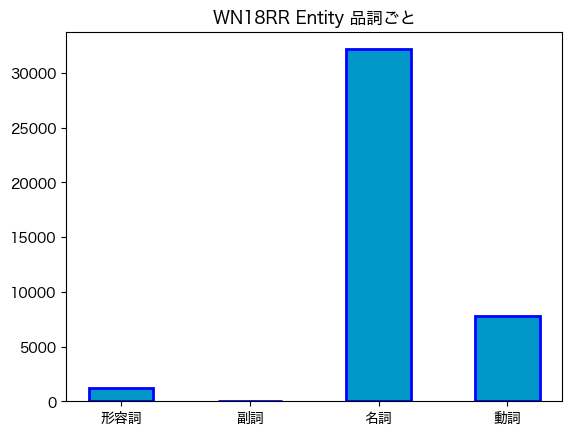

In [47]:
left = [i for i, key in enumerate(labels.keys())]
height = [e_c[key] for key in labels.keys()]

plt.bar(left, height, width=0.5, color='#0096c8',
        edgecolor='b', linewidth=2, tick_label=list(labels.values()))
plt.title('WN18RR Entity 品詞ごと')
print(height)
plt.show()

[2965, 1, 66607, 23430]


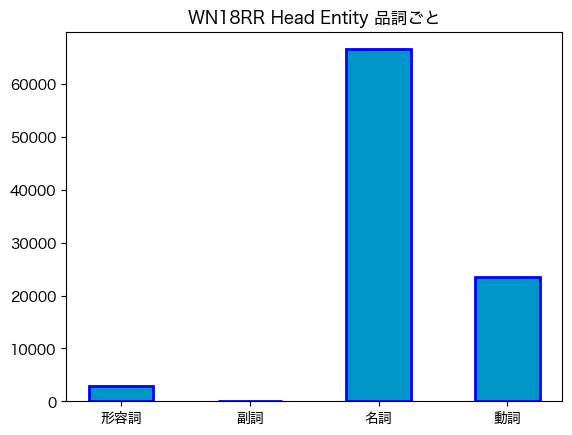

In [48]:
left = [i for i, key in enumerate(labels.keys())]
height = [e1_c[key] for key in labels.keys()]

plt.bar(left, height, width=0.5, color='#0096c8',
        edgecolor='b', linewidth=2, tick_label=list(labels.values()))
plt.title('WN18RR Head Entity 品詞ごと')
print(height)
plt.show()

[2875, 10, 67497, 22621]


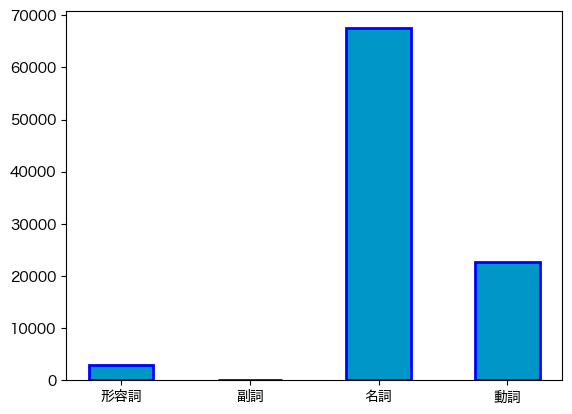

In [49]:
left2 = [i for i, key in enumerate(labels.keys())]
height = [e2_c[key] for key in labels.keys()]

plt.bar(left, height, width=0.5, color='#0096c8',
        edgecolor='b', linewidth=2, tick_label=list(labels.values()))
print(height)
plt.show()

[2875, 10, 67497, 22621]


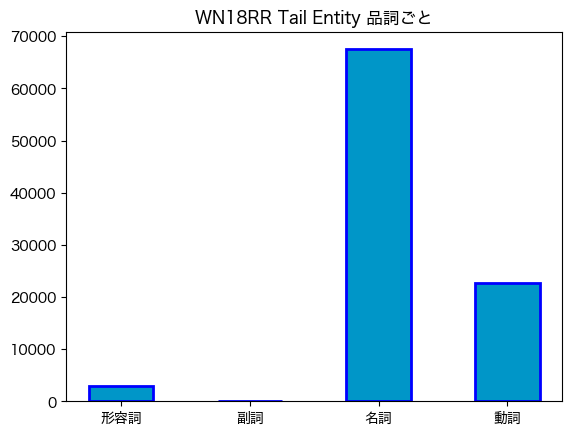

In [50]:
left = [i for i, key in enumerate(labels.keys())]
height = [e2_c[key] for key in labels.keys()]

plt.bar(left, height, width=0.5, color='#0096c8',
        edgecolor='b', linewidth=2, tick_label=list(labels.values()))
plt.title('WN18RR Tail Entity 品詞ごと')
print(height)
plt.show()

[37221, 31867, 3150, 1396, 7928, 3335, 5142, 675, 983, 1220, 86, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


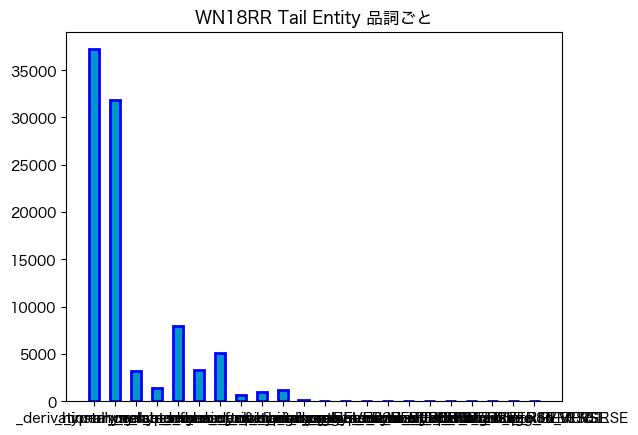

In [51]:
labels = list(r_dict.values())
left = [i for i, key in enumerate(r_dict.keys())]
height = [r_c[key] for key in labels]

plt.bar(left, height, width=0.5, color='#0096c8',
        edgecolor='b', linewidth=2, tick_label=labels)
plt.title('WN18RR Tail Entity 品詞ごと')
print(height)
plt.show()

In [41]:
r_c

Counter({'_hypernym': 37221,
         '_derivationally_related_form': 31867,
         '_instance_hypernym': 3150,
         '_also_see': 1396,
         '_member_meronym': 7928,
         '_synset_domain_topic_of': 3335,
         '_has_part': 5142,
         '_member_of_domain_usage': 675,
         '_member_of_domain_region': 983,
         '_verb_group': 1220,
         '_similar_to': 86})

In [18]:
wn.of2ss('00260881n')

Synset('land_reform.n.01')